In [78]:
import numpy as np

import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, FunctionTransformer


In [47]:
input_path = '/Users/lohries/Desktop/Python/Machine_Learning/Exercises/Csv/stars.csv'
data_frame = pd.read_csv(input_path)
data_frame.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [48]:
data_frame.isnull().any() #Complete data

Temperature (K)           False
Luminosity(L/Lo)          False
Radius(R/Ro)              False
Absolute magnitude(Mv)    False
Star type                 False
Star color                False
Spectral Class            False
dtype: bool

In [49]:
data_frame["Spectral Class"] = data_frame["Spectral Class"].map({'M': 0, 'B' : 1, 'F' : 2, 'O' : 3})
data_frame.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,0.0
1,3042,0.000500,0.1542,16.60,0,Red,0.0
2,2600,0.000300,0.1020,18.70,0,Red,0.0
3,2800,0.000200,0.1600,16.65,0,Red,0.0
4,1939,0.000138,0.1030,20.06,0,Red,0.0


In [50]:
data_frame["Star color"] = data_frame["Star color"].str.upper()
data_frame.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,RED,0.0
1,3042,0.000500,0.1542,16.60,0,RED,0.0
2,2600,0.000300,0.1020,18.70,0,RED,0.0
3,2800,0.000200,0.1600,16.65,0,RED,0.0
4,1939,0.000138,0.1030,20.06,0,RED,0.0


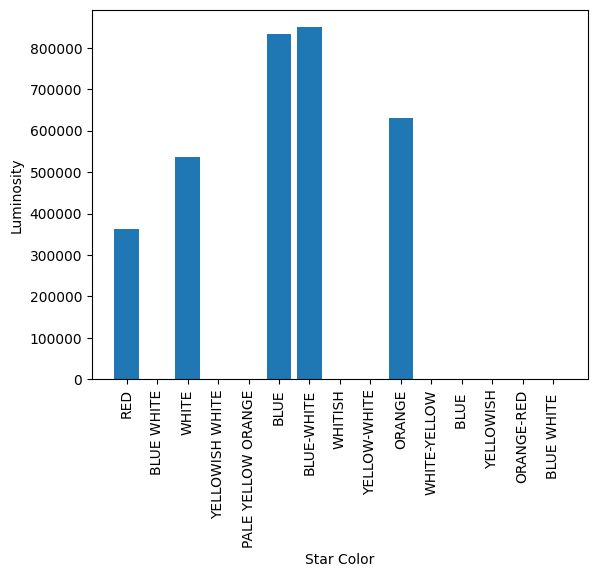

In [51]:
plt.bar(data_frame["Star color"], data_frame["Luminosity(L/Lo)"])
plt.xlabel("Star Color")
plt.ylabel("Luminosity")
plt.xticks(rotation='vertical')
plt.show()

In [52]:
 
data_frame["Star color"] = data_frame["Star color"].map({
    'RED': 0,
    'BLUE WHITE': 1,
    'BLUE-WHITE': 1,
    'WHITE': 2,
    'YELLOWISH WHITE': 3,
    'PALE YELLOW ORANGE': 4,
    'BLUE': 5,
    'ORANGE': 6,
    'ORANGE-RED': 7,
    'WHITISH': 8
})
data_frame.head()



,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0.0,0.0
1,3042,0.000500,0.1542,16.60,0,0.0,0.0
2,2600,0.000300,0.1020,18.70,0,0.0,0.0
3,2800,0.000200,0.1600,16.65,0,0.0,0.0
4,1939,0.000138,0.1030,20.06,0,0.0,0.0


In [53]:
collumns = ["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)", "Star type", "Star color", "Spectral Class"]
correlation = data_frame[collumns].corr()
display(correlation)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129,0.651655,0.691294
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845,0.420152,0.477127
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975,-0.021974,-0.051137
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276,-0.372535,-0.470021
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000,0.417732,0.486079
Star color,0.651655,0.420152,-0.021974,-0.372535,0.417732,1.000000,0.862554
Spectral Class,0.691294,0.477127,-0.051137,-0.470021,0.486079,0.862554,1.000000


<Axes: >

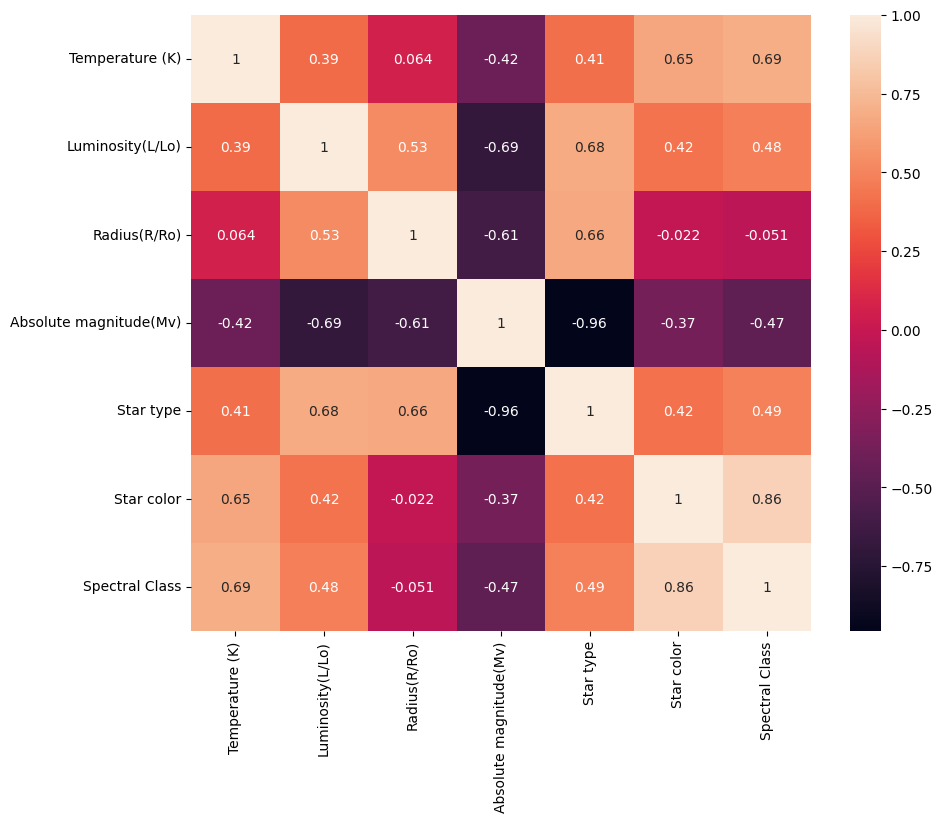

In [54]:
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation, annot=True)

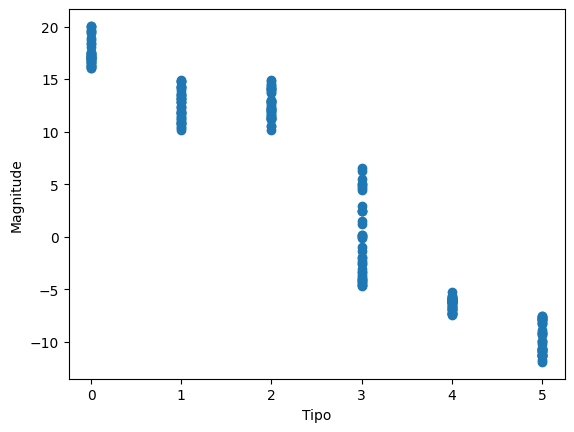

In [56]:
plt.scatter(data_frame["Star type"], data_frame["Absolute magnitude(Mv)"])
plt.ylabel("Magnitude")
plt.xlabel("Tipo")
plt.show()

In [59]:
features = ["Absolute magnitude(Mv)", "Luminosity(L/Lo)", "Radius(R/Ro)"]
data_frame_X = data_frame[features]
data_frame_Y = data_frame["Star type"]



In [60]:
data_frame_Xtrain, data_frame_Xtest, data_frame_Ytrain, data_frame_Ytest = train_test_split(data_frame_Y, data_frame_X, test_size=0.25, shuffle=True)

In [84]:
label = LabelEncoder()
encoded_labels = label.fit_transform(data_frame_Ytrain)
encoded_features = label.fit_transform(data_frame_Xtrain)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(encoded_features, encoded_labels)

ValueError: y should be a 1d array, got an array of shape (180, 3) instead.